## Single-axis Hourly Debug
#### BASED ON JOURNAL 3 - Medium Level Example - 1-Axis tracker by hour (gendaylit)

Example demonstrating the use of doing hourly smiulations with Radiance gendaylit for 1-axis tracking. This is a medium level example because it also explores a couple subtopics:


<a id='step1'></a>


## 1. Load bifacial_radiance 

#### Pay attention: different importing method:

So far we've used "from bifacial_radiance import *" to import all the bifacial_radiance files into our working space in jupyter. For this journal we will do a "import bifacial_radiance" . This method of importing requires a different call for some functions as you'll see below. For example, instead of calling demo = RadianceObj(path = testfolder) as on Tutorial 2, in this case we will neeed to do demo = bifacial_radiance.RadianceObj(path = testfolder). 

In [1]:
import bifacial_radiance
import numpy as np
import os # this operative system to do teh relative-path testfolder for this example.
import pprint    # We will be pretty-printing the trackerdictionary throughout to show its structure.
from pathlib import Path
import pandas as pd

<a id='step2'></a>

## 2. Define all your system variables

Just like in the condensed version show at the end of Tutorial 2, for this tutorial we will be starting all of our system variables from the beginning of the jupyter journal, instead than throughout the different cells (for the most part)

In [2]:
testfolder = r'C:\Users\sayala\Documents\Soltec\Troubleshooting\01Feb2020\Journal_3'

simulationName = 'Tutorial 3'    # For adding a simulation name when defning RadianceObj. This is optional.
moduletype = 'Custom Cell-Level Module'    # We will define the parameters for this below in Step 4.
albedo = "litesoil"      # this is one of the options on ground.rad
lat = 37.5   
lon = -77.6

# Scene variables
nMods = 20
nRows = 7
hub_height = 2.3 # meters
#pitch = 10 # meters      # We will be using pitch instead of GCR for this example.

# Traking parameters
cumulativesky = False
limit_angle = 45 # tracker rotation limit angle
angledelta = 0.01 # we will be doing hourly simulation, we want the angle to be as close to real tracking as possible.
backtrack = True 
gcr = 0.35

<a id='step3'></a>

## 3. Create Radiance Object, Set Albedo and Weather

Same steps as previous two tutorials, so condensing it into one step. You hopefully have this down by now! :)


<div class="alert alert-warning">
Notice that we are doing bifacial_radiance.RadianceObj because we change the import method for this example!
</div>

In [3]:
demo = bifacial_radiance.RadianceObj(simulationName, path = str(testfolder))  # Adding a simulation name. This is optional.
demo.setGround(albedo) 
epwfile = demo.getEPW(lat = 32.2226, lon = -110.9747) 
metdata1 = demo.readWeatherFile(weatherFile = epwfile) 


path = C:\Users\sayala\Documents\Soltec\Troubleshooting\01Feb2020\Journal_3
Loading albedo, 1 value(s), 0.213 avg
1 nonzero albedo values.
Getting weather file: USA_AZ_Tucson.Intl.AP.722740_TMY3.epw
 ... OK!
Saving file EPWs\epw_temp.csv, # points: 8759
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [4]:
startdate = '01/01'     
enddate = '01/02'
sceneDict = {'gcr':gcr,'hub_height':hub_height, 'nMods': nMods, 'nRows': nRows}  
trackingdict= demo.set1axis(limit_angle = limit_angle, backtrack = backtrack, gcr = 0.35, cumulativesky = cumulativesky)
demo.gendaylit1axis(startdate=startdate, enddate=enddate)


Creating ~11 skyfiles.  Takes 1-2 minutes
Created 10 skyfiles in /skies/


{'01_01_08': {'surf_azm': 90.0,
  'surf_tilt': 5.08,
  'theta': -5.08,
  'ghi': 2,
  'dhi': 1,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_08_00.rad'},
 '01_01_09': {'surf_azm': 90.0,
  'surf_tilt': 28.23,
  'theta': -28.23,
  'ghi': 157,
  'dhi': 28,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_09_00.rad'},
 '01_01_10': {'surf_azm': 90.0,
  'surf_tilt': 45.0,
  'theta': -45.0,
  'ghi': 341,
  'dhi': 41,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_10_00.rad'},
 '01_01_11': {'surf_azm': 90.0,
  'surf_tilt': 43.75,
  'theta': -43.75,
  'ghi': 486,
  'dhi': 53,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_11_00.rad'},
 '01_01_12': {'surf_azm': 90.0,
  'surf_tilt': 22.68,
  'theta': -22.68,
  'ghi': 563,
  'dhi': 55,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_12_00.rad'},
 '01_01_13': {'surf_azm': 270.0,
  'surf_tilt': 0.97,
  'theta': 0.97,
  'ghi': 604,
  'dhi': 56,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_13_00.rad'},
 '01_01_14': {'surf_azm':

In [5]:
startdate = '01/01'     
enddate = '01/01'
sceneDict = {'gcr':gcr,'hub_height':hub_height, 'nMods': nMods, 'nRows': nRows}  
trackingdict= demo.set1axis(limit_angle = limit_angle, backtrack = backtrack, gcr = 0.35, cumulativesky = cumulativesky)
demo.gendaylit1axis(startdate=startdate, enddate=enddate)


Creating ~4379 skyfiles.  Takes 1-2 minutes
Created 4359 skyfiles in /skies/


{'01_01_08': {'surf_azm': 90.0,
  'surf_tilt': 5.08,
  'theta': -5.08,
  'ghi': 2,
  'dhi': 1,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_08_00.rad'},
 '01_01_09': {'surf_azm': 90.0,
  'surf_tilt': 28.23,
  'theta': -28.23,
  'ghi': 157,
  'dhi': 28,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_09_00.rad'},
 '01_01_10': {'surf_azm': 90.0,
  'surf_tilt': 45.0,
  'theta': -45.0,
  'ghi': 341,
  'dhi': 41,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_10_00.rad'},
 '01_01_11': {'surf_azm': 90.0,
  'surf_tilt': 43.75,
  'theta': -43.75,
  'ghi': 486,
  'dhi': 53,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_11_00.rad'},
 '01_01_12': {'surf_azm': 90.0,
  'surf_tilt': 22.68,
  'theta': -22.68,
  'ghi': 563,
  'dhi': 55,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_12_00.rad'},
 '01_01_13': {'surf_azm': 270.0,
  'surf_tilt': 0.97,
  'theta': 0.97,
  'ghi': 604,
  'dhi': 56,
  'skyfile': 'skies\\sky2_32.13_-110.95_2001_01_01_13_00.rad'},
 '01_01_14': {'surf_azm':

In [6]:
startdate = '02/02'     
enddate = '02/02'
sceneDict = {'gcr':gcr,'hub_height':hub_height, 'nMods': nMods, 'nRows': nRows}  
trackingdict= demo.set1axis(limit_angle = limit_angle, backtrack = backtrack, gcr = 0.35, cumulativesky = cumulativesky)
demo.gendaylit1axis(startdate=startdate, enddate=enddate)


Creating ~0 skyfiles.  Takes 1-2 minutes
Created 0 skyfiles in /skies/


{}

### Testing Routine with TMY3

In [21]:
tmyfile = r'C:\Users\sayala\Documents\GitHub\bifacialvf\bifacialvf\data\722740TYA.CSV'


In [20]:
demo = bifacial_radiance.RadianceObj(simulationName, path = str(testfolder))  # Adding a simulation name. This is optional.
demo.setGround(albedo) 
metdata1 = demo.readWeatherFile(weatherFile = tmyfile) 


path = C:\Users\sayala\Documents\Soltec\Troubleshooting\01Feb2020\Journal_3
Loading albedo, 1 value(s), 0.213 avg
1 nonzero albedo values.
Saving file EPWs\tmy3_temp.csv, # points: 8759
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [22]:
startdate = '01/01'     
enddate = '01/02'
sceneDict = {'gcr':gcr,'hub_height':hub_height, 'nMods': nMods, 'nRows': nRows}  
trackingdict= demo.set1axis(limit_angle = limit_angle, backtrack = backtrack, gcr = 0.35, cumulativesky = cumulativesky)
demo.gendaylit1axis(startdate=startdate, enddate=enddate)


Creating ~11 skyfiles.  Takes 1-2 minutes
Created 10 skyfiles in /skies/


{'01_01_08': {'surf_azm': 90.0,
  'surf_tilt': 5.1,
  'theta': -5.1,
  'ghi': 2,
  'dhi': 1,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_08_00.rad'},
 '01_01_09': {'surf_azm': 90.0,
  'surf_tilt': 28.26,
  'theta': -28.26,
  'ghi': 157,
  'dhi': 28,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_09_00.rad'},
 '01_01_10': {'surf_azm': 90.0,
  'surf_tilt': 45.0,
  'theta': -45.0,
  'ghi': 341,
  'dhi': 41,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_10_00.rad'},
 '01_01_11': {'surf_azm': 90.0,
  'surf_tilt': 43.73,
  'theta': -43.73,
  'ghi': 486,
  'dhi': 53,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_11_00.rad'},
 '01_01_12': {'surf_azm': 90.0,
  'surf_tilt': 22.64,
  'theta': -22.64,
  'ghi': 563,
  'dhi': 55,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_12_00.rad'},
 '01_01_13': {'surf_azm': 270.0,
  'surf_tilt': 1.02,
  'theta': 1.02,
  'ghi': 604,
  'dhi': 56,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_13_00.rad'},
 '01_01_14': {'surf_a

In [23]:
startdate = '01/01'     
enddate = '01/01'
sceneDict = {'gcr':gcr,'hub_height':hub_height, 'nMods': nMods, 'nRows': nRows}  
trackingdict= demo.set1axis(limit_angle = limit_angle, backtrack = backtrack, gcr = 0.35, cumulativesky = cumulativesky)
demo.gendaylit1axis(startdate=startdate, enddate=enddate)


Creating ~4379 skyfiles.  Takes 1-2 minutes
Created 4362 skyfiles in /skies/


{'01_01_08': {'surf_azm': 90.0,
  'surf_tilt': 5.1,
  'theta': -5.1,
  'ghi': 2,
  'dhi': 1,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_08_00.rad'},
 '01_01_09': {'surf_azm': 90.0,
  'surf_tilt': 28.26,
  'theta': -28.26,
  'ghi': 157,
  'dhi': 28,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_09_00.rad'},
 '01_01_10': {'surf_azm': 90.0,
  'surf_tilt': 45.0,
  'theta': -45.0,
  'ghi': 341,
  'dhi': 41,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_10_00.rad'},
 '01_01_11': {'surf_azm': 90.0,
  'surf_tilt': 43.73,
  'theta': -43.73,
  'ghi': 486,
  'dhi': 53,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_11_00.rad'},
 '01_01_12': {'surf_azm': 90.0,
  'surf_tilt': 22.64,
  'theta': -22.64,
  'ghi': 563,
  'dhi': 55,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_12_00.rad'},
 '01_01_13': {'surf_azm': 270.0,
  'surf_tilt': 1.02,
  'theta': 1.02,
  'ghi': 604,
  'dhi': 56,
  'skyfile': 'skies\\sky2_32.133_-110.95_2002_01_01_13_00.rad'},
 '01_01_14': {'surf_a

In [24]:
startdate = '02/02'     
enddate = '02/02'
sceneDict = {'gcr':gcr,'hub_height':hub_height, 'nMods': nMods, 'nRows': nRows}  
trackingdict= demo.set1axis(limit_angle = limit_angle, backtrack = backtrack, gcr = 0.35, cumulativesky = cumulativesky)
demo.gendaylit1axis(startdate=startdate, enddate=enddate)


Creating ~0 skyfiles.  Takes 1-2 minutes
Created 0 skyfiles in /skies/


{}

# EXPLORE PVLIB EPW Issue

In [7]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt

Getting weather file: USA_AZ_Tucson.Intl.AP.722740_TMY3.epw
 ... OK!


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


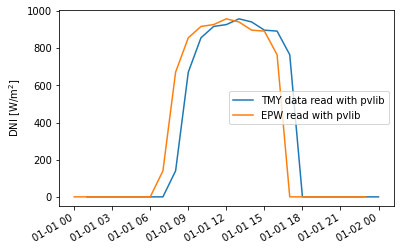

In [8]:
(epwdata, metadata) = pvlib.iotools.epw.read_epw(epwfile, coerce_year=2002) #pvlib>0.6.1
(tmydata, metadata) = pvlib.iotools.tmy.read_tmy3(tmyfile, coerce_year=2002) #pvlib>0.6.1

fig, ax = plt.subplots()
ax.plot(tmydata.index[0:24], tmydata.DNI[0:24], label='TMY data read with pvlib')
ax.plot(epwdata.index[0:24], epwdata.dni[0:24], label='EPW read with pvlib')
ax.set_ylabel('DNI [W/m$^2$]')
ax.legend()
fig.autofmt_xdate()

In [9]:
#### Using Suggested Fix


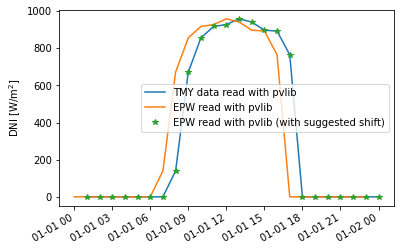

In [10]:
epwdata_fix = epwdata.copy()
epwdata_fix .index = epwdata_fix .index+pd.Timedelta(hours=1) 

fig, ax = plt.subplots()
ax.plot(tmydata.index[0:24], tmydata.DNI[0:24], label='TMY data read with pvlib')
ax.plot(epwdata.index[0:24], epwdata.dni[0:24], label='EPW read with pvlib ')
ax.plot(epwdata_fix.index[0:24], epwdata_fix .dni[0:24], '*', label='EPW read with pvlib (with suggested shift)')
ax.set_ylabel('DNI [W/m$^2$]')
ax.legend()
fig.autofmt_xdate()

In [11]:
### Comparing to what bifacial_radiance is reading

In [12]:
demo = bifacial_radiance.RadianceObj(simulationName, path = str(testfolder))  # Adding a simulation name. This is optional.
demo.setGround(albedo) 
metdata1 = demo.readWeatherFile(weatherFile = epwfile) 
metdata2 = demo.readWeatherFile(weatherFile = tmyfile) 


path = C:\Users\sayala\Documents\Soltec\Troubleshooting\01Feb2020\Journal_3
Loading albedo, 1 value(s), 0.213 avg
1 nonzero albedo values.
Saving file EPWs\epw_temp.csv, # points: 8759
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Saving file EPWs\tmy3_temp.csv, # points: 8759
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [13]:
metdata1.dni[0:24]

array([  0,   0,   0,   0,   0,   0,   0, 140, 671, 856, 917, 927, 958,
       941, 897, 892, 765,   0,   0,   0,   0,   0,   0,   0], dtype=int64)

In [14]:
metdata2.dni[0:24]

array([  0,   0,   0,   0,   0,   0,   0, 140, 671, 856, 917, 927, 958,
       941, 897, 892, 765,   0,   0,   0,   0,   0,   0,   0], dtype=int64)

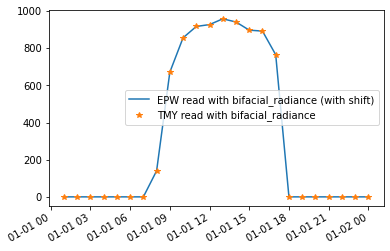

In [15]:
fig, ax = plt.subplots()
ax.plot(metdata1.datetime[0:24], metdata1.dni[0:24], label='EPW read with bifacial_radiance (with shift)')
ax.plot(metdata1.datetime[0:24], metdata2.dni[0:24], '*', label='TMY read with bifacial_radiance')
ax.legend()
fig.autofmt_xdate()

### Going into bifacial_radiance Matcher Code

In [16]:
import pandas as pd
import re

In [17]:
metdata1 = demo.readWeatherFile(weatherFile = epwfile) 
temp = pd.to_datetime(demo.metdata.datetime)
print(len(temp))
temp2 = temp.month*10000+temp.day*100+temp.hour
startdate = '01/01'  
match1 = re.split('_|/',startdate) 
matchval = int(match1[0])*10000+int(match1[1])*100
print(matchval)
startindex = temp2.to_list().index(matchval)
print(startindex)

Saving file EPWs\epw_temp.csv, # points: 8759
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
8759
10100


ValueError: 10100 is not in list

In [18]:
metdata1 = demo.readWeatherFile(weatherFile = tmyfile) 
temp = pd.to_datetime(demo.metdata.datetime)
temp2 = temp.month*10000+temp.day*100+temp.hour
print(len(temp))
startdate = '01/01'  
match1 = re.split('_|/',startdate) 
matchval = int(match1[0])*10000+int(match1[1])*100
print(matchval)
startindex = temp2.to_list().index(matchval)
print(startindex)

Saving file EPWs\tmy3_temp.csv, # points: 8759
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
8759
10100


ValueError: 10100 is not in list

In [19]:
enddate = '01/02'  
match1 = re.split('_|/',enddate) 
matchval = int(match1[0])*10000+int(match1[1])*100
print(matchval)
endindex = temp2.to_list().index(matchval)
print(endindex)

10200
23
